In [1]:
import os
from glob import glob
from pathlib import Path
import pandas as pd

In [2]:
d = "/home/shashank/workspace/datascience/assignment/datavisualization/data_set"

In [3]:
folders = [os.path.join(d, o) for o in os.listdir(d) if os.path.isdir(os.path.join(d,o))]

In [4]:
fileslist = []
for i in folders:
    os.chdir(i)
    for j in glob("*.csv"):
        fileslist.append(os.path.join(i,j))

In [5]:
dataframe = pd.read_csv(fileslist[0])
for i in range(len(fileslist)-1):
    dataframe = pd.concat([dataframe,pd.read_csv(fileslist[i+1])],ignore_index=True) # This is for resetting index

In [3]:
dataframe = pd.read_csv(os.path.join(d,"result.csv"))

In [4]:
df=dataframe.copy(deep=True)

In [5]:
dataframe.isnull().any()

Unnamed: 0               False
Crime ID                  True
Month                    False
Reported by              False
Falls within             False
Longitude                 True
Latitude                  True
Location                 False
LSOA code                 True
LSOA name                 True
Crime type               False
Last outcome category     True
Context                   True
dtype: bool

In [6]:
dataframe.isnull().sum()

Unnamed: 0                     0
Crime ID                  866043
Month                          0
Reported by                    0
Falls within                   0
Longitude                  96500
Latitude                   96500
Location                       0
LSOA code                  96525
LSOA name                  96525
Crime type                     0
Last outcome category     866043
Context                  4229783
dtype: int64

In [7]:
dataframe.drop('Crime ID',axis=1, inplace=True) # Crime ID  has 866043 null rows
dataframe.drop('Context',axis=1, inplace=True) # Context has 4229783 null rows
dataframe.drop('Last outcome category',axis=1, inplace=True) #Last outcome category has 866043 null rows
dataframe.drop('Unnamed: 0',axis=1, inplace=True) #Last outcome category has 866043 null rows

In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4229783 entries, 0 to 4229782
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Month         object 
 1   Reported by   object 
 2   Falls within  object 
 3   Longitude     float64
 4   Latitude      float64
 5   Location      object 
 6   LSOA code     object 
 7   LSOA name     object 
 8   Crime type    object 
dtypes: float64(2), object(7)
memory usage: 290.4+ MB


In [9]:
df_group = dataframe[(dataframe['Latitude'].notna())&(dataframe['Longitude'].notna())].groupby('Falls within')

In [10]:
lonmean =  dataframe[(dataframe['Latitude'].notna())&(dataframe['Longitude'].notna())].groupby('Falls within')['Longitude'].mean()
    

In [11]:
latmean = dataframe[(dataframe['Latitude'].notna())&(dataframe['Longitude'].notna())].groupby('Falls within')['Latitude'].mean()

In [12]:
print(lonmean['Essex Police'],latmean['Essex Police'])

0.55323639570259 51.688989631426004


# fillna + groupby + transform + mean
This seems intuitive:

# df['value'] = df['value'].fillna(df.groupby('name')['value'].transform('mean'))
The groupby + transform syntax maps the groupwise mean to the index of the original dataframe.

In [13]:
dataframe['Latitude'] = dataframe['Latitude'].fillna(dataframe.groupby('Falls within')['Latitude'].transform('mean'))
dataframe['Longitude'] = dataframe['Longitude'].fillna(dataframe.groupby('Falls within')['Longitude'].transform('mean'))

In [14]:
dataframe[(dataframe['Latitude'].isnull())&(dataframe['Longitude'].isnull())].groupby('Falls within').count()

,Month,Reported by,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type
Falls within,,,,,,,,


# Visualising Data


In [15]:
import seaborn as sns


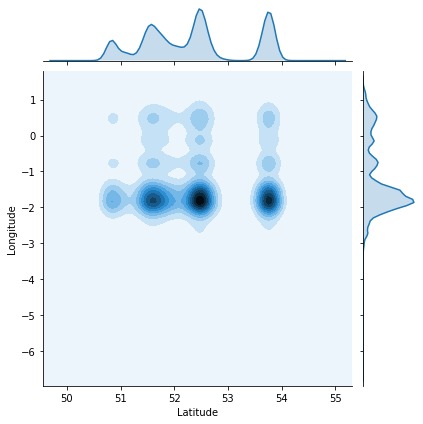

In [17]:
sns.jointplot(x=dataframe.sample(100000)['Latitude'], y=dataframe.sample(100000)['Longitude'], data=dataframe, kind="kde");